## Customer Segmentation Using K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/customer_metrics.csv'

try:
    customer_metrics = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    customer_metrics = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


In [4]:
customer_metrics

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference,purchase_consistency_days,frequency_type
0,AA-10315,1157.990034,5,5563.560,1112.712000,-362.8825,-72.576500,118 days,0.294118,Regular,Standard Class,0.454545,High,184,1,1,4,114,Big Spenders,3,Office Supplies,2014-03-31,2017-06-29,1186,9,Central,Consumer,Texas,Round Rock,118,Low Frequency
1,AA-10375,126.508857,9,1056.390,117.376667,277.3824,30.820267,95 days,0.529412,Regular,Standard Class,0.400000,Low,19,4,4,1,441,Loyal Customers,3,Office Supplies,2014-04-21,2017-12-11,1330,7,East,Consumer,Georgia,Atlanta,95,Low Frequency
2,AA-10480,176.229194,4,1790.512,447.628000,435.8274,108.956850,97 days,0.235294,Regular,Standard Class,0.083333,High,259,1,1,2,112,Others,3,Office Supplies,2014-05-04,2017-04-15,1077,7,Central,Consumer,Michigan,Detroit,97,Low Frequency
3,AA-10645,429.222188,6,5086.935,847.822500,857.8033,142.967217,72 days,0.352941,Regular,Standard Class,0.222222,Low,55,3,2,4,324,Big Spenders,3,Furniture,2014-06-22,2017-11-05,1232,9,East,Consumer,California,Georgetown,72,High Frequency
4,AB-10015,139.432371,3,886.156,295.385333,129.3465,43.115500,199 days,0.176471,New,First Class,0.333333,High,415,1,1,1,111,At Risk,3,Office Supplies,2014-02-18,2016-11-10,996,5,Central,Consumer,Washington,Seattle,199,Low Frequency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,99.797025,11,2374.658,215.878000,621.2300,56.475455,51 days,0.647059,VIP,Standard Class,0.250000,Low,43,3,4,3,343,Potential Loyalists,3,Office Supplies,2014-01-20,2017-11-17,1397,9,West,Consumer,California,Los Angeles,51,High Frequency
789,YC-21895,1001.745332,5,5454.350,1090.870000,1305.6290,261.125800,162 days,0.294118,Regular,Standard Class,0.375000,Low,4,4,1,4,414,Loyal Customers,3,Office Supplies,2014-11-17,2017-12-26,1135,6,Central,Corporate,Delaware,Newark,162,Low Frequency
790,YS-21880,843.178533,7,6263.404,894.772000,1689.6185,241.374071,119 days,0.411765,Regular,Standard Class,0.300000,Low,9,4,3,4,434,Loyal Customers,3,Office Supplies,2015-01-12,2017-12-21,1074,6,West,Corporate,California,Seattle,119,Low Frequency
791,ZC-21910,443.088666,13,8025.707,617.362077,-1032.1490,-79.396077,37 days,0.764706,VIP,Standard Class,0.645161,Low,54,3,4,4,344,Potential Loyalists,3,Office Supplies,2014-10-13,2017-11-06,1120,12,West,Consumer,Texas,Houston,37,High Frequency


- **Customer ID:** Unique identifier for each customer.
- **Order Size Variability:** Variability in the size of orders placed by the customer.
- **Total Orders:** Total number of orders placed by the customer.
- **Total Sales:** Total sales amount from the customer.
- **Average Order Value:** Average value of orders placed by the customer.
- **Total Profit:** Total profit from the customer.
- **Average Profit per Order:** Average profit earned per order from the customer.
- **Purchase Consistency:** How consistently the customer makes purchases over time.
- **Engagement Score:** A score representing the customer's engagement based on their activity.
- **Loyalty Status:** Classification of the customer's loyalty.
- **First Purchase Date, Last Purchase Date:** Dates representing the customer's first and last purchase.
- **Customer Tenure:** The length of time the customer has been with the company.
- **Cross Buy Index:** A metric indicating the variety of different product categories purchased.
- **Region Preference, Customer Segment, State Preference, City Preference:** Various demographic and geographical attributes of the customer.
- **Recency, Recency Score:** How recently the customer has made a purchase and its scoring based on recency.
- **Frequency Score, Monetary Score, RFM Score:** Scores based on the frequency and monetary value of purchases, and an overall RFM (Recency, Frequency, Monetary) score.
- **Product Diversity:** The diversity of products purchased by the customer.


In [5]:
# List of numerical columns to scale (excluding IDs and non-numerical features)
numerical_columns = [
    'order_size_variability', 'total_orders', 'total_sales', 'average_order_value',
    'total_profit', 'average_profit_per_order', 'engagement_score', 'customer_tenure',
    'cross_buy_index', 'recency', 'recency_score', 'frequency_score', 'monetary_score',
    'rfm_score', 'product_diversity', 'purchase_consistency_days'
]

In [6]:
# Create a scaler object
scaler = StandardScaler()

In [7]:
# Scale these columns
data_scaled = customer_metrics.copy()
data_scaled[numerical_columns] = scaler.fit_transform(customer_metrics[numerical_columns])


In [8]:
data_scaled.head()

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference,purchase_consistency_days,frequency_type
0,AA-10315,1.657665,-0.503211,1.027912,1.507073,-0.804820,-0.792587,118 days,-0.503211,Regular,Standard Class,0.454545,High,0.194182,-1.347191,-1.027079,1.342657,-1.387376,Big Spenders,0.506691,Office Supplies,2014-03-31,2017-06-29,0.607818,0.571618,Central,Consumer,Texas,Round Rock,0.102066,Low Frequency
1,AA-10375,-0.555661,1.066293,-0.693801,-0.788344,-0.086306,-0.145118,95 days,1.066293,Regular,Standard Class,0.400000,Low,-0.685708,1.334790,1.499726,-1.339275,1.423725,Loyal Customers,0.506691,Office Supplies,2014-04-21,2017-12-11,1.066880,-0.209922,East,Consumer,Georgia,Atlanta,-0.185971,Low Frequency
2,AA-10480,-0.448972,-0.895587,-0.413371,-0.026727,0.091504,0.344173,97 days,-0.895587,Regular,Standard Class,0.083333,High,0.594132,-1.347191,-1.027079,-0.445298,-1.404569,Others,0.506691,Office Supplies,2014-05-04,2017-04-15,0.260333,-0.209922,Central,Consumer,Michigan,Detroit,-0.160924,Low Frequency
3,AA-10645,0.093894,-0.110835,0.845844,0.896192,0.565051,0.557145,72 days,-0.110835,Regular,Standard Class,0.222222,Low,-0.493732,0.440796,-0.184810,1.342657,0.417918,Big Spenders,0.506691,Furniture,2014-06-22,2017-11-05,0.754462,0.571618,East,Consumer,California,Georgetown,-0.474008,High Frequency
4,AB-10015,-0.527930,-1.287963,-0.758830,-0.377825,-0.252434,-0.068125,199 days,-1.287963,New,First Class,0.333333,High,1.426028,-1.347191,-1.027079,-1.339275,-1.413166,At Risk,0.506691,Office Supplies,2014-02-18,2016-11-10,0.002111,-0.991461,Central,Consumer,Washington,Seattle,1.116457,Low Frequency


The numerical features in the dataset have been successfully normalized. The next step is to determine the optimal number of clusters for K-means clustering. We can use the Elbow Method, which involves running K-means clustering on the dataset for a range of values of k (number of clusters) and then plotting the sum of squared distances from each point to its assigned center (inertia). When the plot starts resembling an arm, the "elbow" (where the rate of decrease sharply shifts) can indicate the appropriate number of clusters.

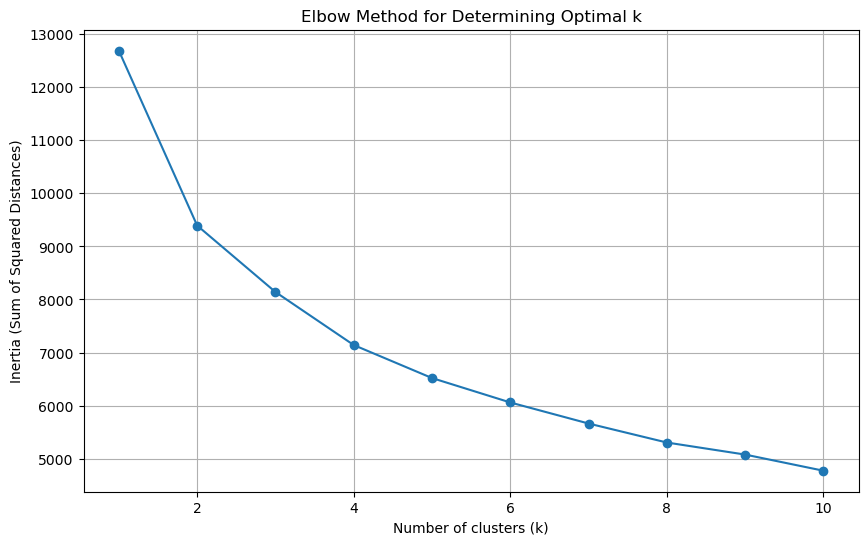

In [9]:
# Determine the range of k values to test
k_values = range(1, 11)

# Compute the inertia for each k value
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,  n_init=10, random_state=0)
    kmeans.fit(data_scaled[numerical_columns])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

The Elbow Method plot shows how the inertia decreases as the number of clusters increases. Typically, the optimal number of clusters is chosen at the point where the decrease in inertia becomes less rapid, resembling an elbow in the plot.

From the plot, it seems like the elbow could be around 𝑘=3 or 𝑘=4. This indicates that 3 or 4 clusters might be a reasonable choice for segmenting this customer dataset.


In [17]:
# Apply K-means clustering with k=4 and n_init explicitly set to 10
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled[numerical_columns])


In [18]:
data_scaled

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference,purchase_consistency_days,frequency_type,cluster
0,AA-10315,1.657665,-0.503211,1.027912,1.507073,-0.804820,-0.792587,118 days,-0.503211,Regular,Standard Class,0.454545,High,0.194182,-1.347191,-1.027079,1.342657,-1.387376,Big Spenders,0.506691,Office Supplies,2014-03-31,2017-06-29,0.607818,0.571618,Central,Consumer,Texas,Round Rock,0.102066,Low Frequency,1
1,AA-10375,-0.555661,1.066293,-0.693801,-0.788344,-0.086306,-0.145118,95 days,1.066293,Regular,Standard Class,0.400000,Low,-0.685708,1.334790,1.499726,-1.339275,1.423725,Loyal Customers,0.506691,Office Supplies,2014-04-21,2017-12-11,1.066880,-0.209922,East,Consumer,Georgia,Atlanta,-0.185971,Low Frequency,3
2,AA-10480,-0.448972,-0.895587,-0.413371,-0.026727,0.091504,0.344173,97 days,-0.895587,Regular,Standard Class,0.083333,High,0.594132,-1.347191,-1.027079,-0.445298,-1.404569,Others,0.506691,Office Supplies,2014-05-04,2017-04-15,0.260333,-0.209922,Central,Consumer,Michigan,Detroit,-0.160924,Low Frequency,1
3,AA-10645,0.093894,-0.110835,0.845844,0.896192,0.565051,0.557145,72 days,-0.110835,Regular,Standard Class,0.222222,Low,-0.493732,0.440796,-0.184810,1.342657,0.417918,Big Spenders,0.506691,Furniture,2014-06-22,2017-11-05,0.754462,0.571618,East,Consumer,California,Georgetown,-0.474008,High Frequency,3
4,AB-10015,-0.527930,-1.287963,-0.758830,-0.377825,-0.252434,-0.068125,199 days,-1.287963,New,First Class,0.333333,High,1.426028,-1.347191,-1.027079,-1.339275,-1.413166,At Risk,0.506691,Office Supplies,2014-02-18,2016-11-10,0.002111,-0.991461,Central,Consumer,Washington,Seattle,1.116457,Low Frequency,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,-0.612978,1.851045,-0.190230,-0.561183,0.299565,0.015535,51 days,1.851045,VIP,Standard Class,0.250000,Low,-0.557724,0.440796,1.499726,0.448680,0.581254,Potential Loyalists,0.506691,Office Supplies,2014-01-20,2017-11-17,1.280471,0.571618,West,Consumer,California,Los Angeles,-0.736998,High Frequency,3
789,YC-21895,1.322399,-0.503211,0.986195,1.456702,1.067608,1.297053,162 days,-0.503211,Regular,Standard Class,0.375000,Low,-0.765698,1.334790,-1.027079,1.342657,1.191616,Loyal Customers,0.506691,Office Supplies,2014-11-17,2017-12-26,0.445233,-0.600692,Central,Corporate,Delaware,Newark,0.653093,Low Frequency,0
790,YS-21880,0.982151,0.281541,1.295249,1.004466,1.498526,1.173368,119 days,0.281541,Regular,Standard Class,0.300000,Low,-0.739035,1.334790,0.657458,1.342657,1.363548,Loyal Customers,0.506691,Office Supplies,2015-01-12,2017-12-21,0.250769,-0.600692,West,Corporate,California,Seattle,0.114589,Low Frequency,3
791,ZC-21910,0.123648,2.635796,1.968439,0.364710,-1.555881,-0.835291,37 days,2.635796,VIP,Standard Class,0.645161,Low,-0.499065,0.440796,1.499726,1.342657,0.589851,Potential Loyalists,0.506691,Office Supplies,2014-10-13,2017-11-06,0.397414,1.743928,West,Consumer,Texas,Houston,-0.912325,High Frequency,3


In [21]:
# Recalculate the means for each cluster for all the numerical columns explicitly
cluster_centers_corrected = data_scaled.groupby('cluster')[numerical_columns].mean()
cluster_centers_corrected

,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,engagement_score,customer_tenure,cross_buy_index,recency,recency_score,frequency_score,monetary_score,rfm_score,product_diversity,purchase_consistency_days
cluster,,,,,,,,,,,,,,,,
0,-0.210171,-0.522274,-0.493740,-0.286903,-0.295263,-0.223425,-0.522274,0.171110,-0.550066,-0.460484,0.408222,-0.624700,-0.600930,0.323007,-0.257386,0.626982
1,-0.231763,-0.870805,-0.471807,-0.116527,-0.201174,-0.098030,-0.870805,-1.046333,-0.668562,1.317915,-1.215444,-0.854192,-0.581747,-1.261548,-0.422525,-0.032395
2,4.861699,-0.241627,3.677130,4.394902,3.798641,3.976914,-0.241627,0.069907,-0.027562,-0.060364,-0.095600,-0.353264,1.342657,-0.115074,0.236114,0.155499
3,0.067513,0.874132,0.458769,0.079418,0.158866,0.041519,0.874132,0.455984,0.772160,-0.398120,0.385741,0.943977,0.700357,0.474010,0.411473,-0.442938


**Cluster 0:**
- Lower Activity in Orders: Customers have lower variability and total sales.
- Low Engagement: This cluster has the lowest engagement scores, indicating less frequent interactions.
- Recent Purchases: Despite lower activity, purchases are relatively recent.

**Cluster 1:**
- Inactive and At-Risk: These customers have the lowest scores across engagement, frequency, and monetary metrics, and the longest recency, suggesting they are at risk of churning.
- Newest Customers: They exhibit the shortest tenure, which might explain their low engagement.

**Cluster 2:**
- High Spenders with Varied Orders: This cluster represents high-value customers with significant variability in order sizes and high average order values.
- Highly Profitable: These customers contribute significantly to profits, suggesting they may be targeted for premium services.

**Cluster 3:**
- Engaged and Frequent Buyers: Customers in this cluster are highly engaged with frequent and recent purchases.
- Broad Product Interest: They show interest across a diverse range of product categories.


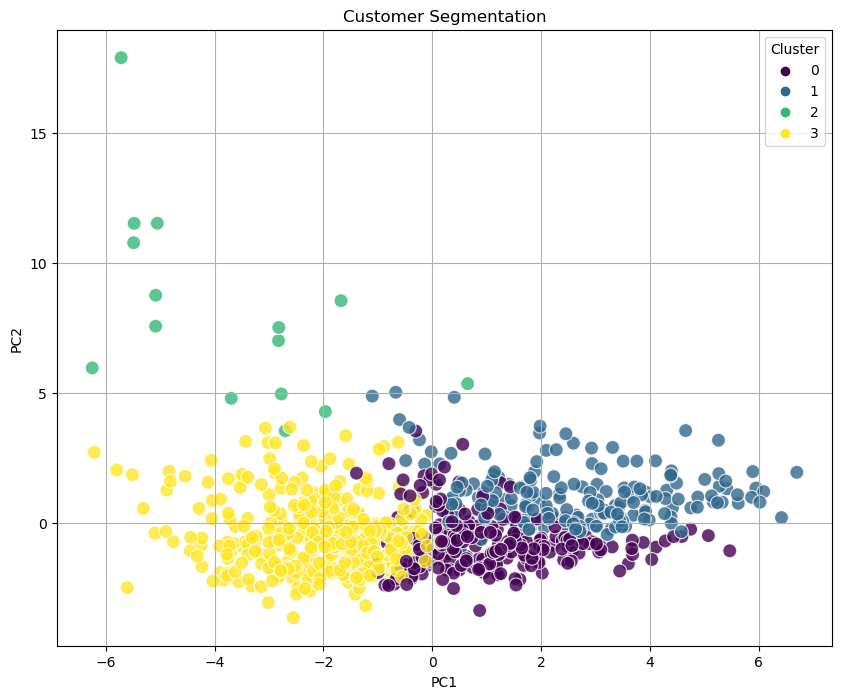

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled[numerical_columns])

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_scaled['cluster']

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.8).set_title('Customer Segmentation')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The scatter plot visualizes the four clusters in two-dimensional space, created using PCA from the multi-dimensional customer data. Each point represents a customer, and the colors indicate the cluster to which each customer belongs. This visualization helps us see how distinct the clusters are and how they are distributed relative to each other.

- **Cluster 0 (Purple):** These customers are somewhat grouped together but spread slightly, indicating variability within the cluster but still distinct from others.
- **Cluster 1 (Blue):** Appears tightly grouped and distinct, suggesting similar behavior among these customers.
- **Cluster 2 (Green):** Also forms a tight cluster, clearly separate from others, aligning with their unique high spending and high variability characteristics.
- **Cluster 3 (Yellow):** Spread out, indicating diverse characteristics within the cluster but distinct enough from others.


In [30]:
# Define the categorical metrics for aggregation
categorical_metrics = ['region_preference', 'customer_segment', 'state_preference', 'city_preference']

# Adjust to perform aggregation on the data_scaled dataframe where 'cluster' is defined
cluster_summary_scaled = data_scaled.groupby('cluster')[numerical_columns].mean()

# Adjust categorical aggregation to use the original data with cluster assignments
data_with_clusters = customer_metrics.copy()
data_with_clusters['cluster'] = data_scaled['cluster']  # Assign the clusters to the original data

# Aggregate the mode for categorical geographic and demographic data
mode_values_scaled = data_with_clusters.groupby('cluster')[categorical_metrics].agg(pd.Series.mode)

# Combine the summaries
cluster_profile_scaled = pd.concat([cluster_summary_scaled, mode_values_scaled], axis=1)
cluster_profile_scaled


,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,engagement_score,customer_tenure,cross_buy_index,recency,recency_score,frequency_score,monetary_score,rfm_score,product_diversity,purchase_consistency_days,region_preference,customer_segment,state_preference,city_preference
cluster,,,,,,,,,,,,,,,,,,,,
0,-0.210171,-0.522274,-0.493740,-0.286903,-0.295263,-0.223425,-0.522274,0.171110,-0.550066,-0.460484,0.408222,-0.624700,-0.600930,0.323007,-0.257386,0.626982,East,Consumer,California,New York City
1,-0.231763,-0.870805,-0.471807,-0.116527,-0.201174,-0.098030,-0.870805,-1.046333,-0.668562,1.317915,-1.215444,-0.854192,-0.581747,-1.261548,-0.422525,-0.032395,East,Consumer,California,New York City
2,4.861699,-0.241627,3.677130,4.394902,3.798641,3.976914,-0.241627,0.069907,-0.027562,-0.060364,-0.095600,-0.353264,1.342657,-0.115074,0.236114,0.155499,"[Central, East, South]",Consumer,California,Los Angeles
3,0.067513,0.874132,0.458769,0.079418,0.158866,0.041519,0.874132,0.455984,0.772160,-0.398120,0.385741,0.943977,0.700357,0.474010,0.411473,-0.442938,West,Consumer,California,New York City


**Cluster 0 (Low Activity, Moderate Recent Engagement):**
- **Financial Metrics:** Low sales, order value, and profit.
- **Behavioral Metrics:** Lower engagement and purchase consistency; customers buy infrequently.
- **Demographics:** Mostly from the East region, commonly in the Consumer segment.
- **Geography:** Predominantly in California with New York City being a common city preference.

**Cluster 1 (Inactive, At Risk of Churn):**
- **Financial Metrics:** Similar to Cluster 0 but slightly higher order values.
- **Behavioral Metrics:** Lowest engagement, negative growth in customer tenure suggesting high churn.
- **Demographics:** Also primarily from the East, and largely Consumers.
- **Geography:** Similar to Cluster 0, with California and New York City being prominent.

**Cluster 2 (High Spenders, Varied Purchases):**
- **Financial Metrics:** Significantly higher sales, order values, and profits.
- **Behavioral Metrics:** Moderate engagement but high sales, suggesting transactional but high-value customers.
- **Demographics:** Distributed across Central, East, and South regions, with a diverse segment profile.
- **Geography:** California is common but includes diverse city preferences like Los Angeles.

**Cluster 3 (Highly Engaged, Frequent Buyers):**
- **Financial Metrics:** Good sales and profitability with moderate order values.
- **Behavioral Metrics:** Highest engagement, frequent purchases, and a broad product diversity.
- **Demographics:** Primarily from the West, consistently in the Consumer segment.
- **Geography:** Predominantly in California with New York City as a common city.

**Tailored Strategies:**
With these detailed profiles, you can tailor specific strategies for each cluster. For example:
- **Cluster 0 & 1:** Engage with personalized marketing to increase activity and reduce churn risk.
- **Cluster 2:** Offer premium services or loyalty programs to enhance their buying experience and maintain high value.
- **Cluster 3:** Leverage their engagement by introducing referral programs or cross-selling diverse product categories.


**Cluster 0: Low Activity, Moderate Recent Engagement**
- **Engagement Initiatives:** Increase engagement through personalized email campaigns that offer incentives tailored to their previous purchasing patterns.
- **Feedback Solicitation:** Encourage feedback on their purchase experience to increase interaction and gather insights to improve services or products.
- **Reactivation Campaigns:** Deploy reactivation strategies such as limited-time offers or loyalty program invitations to encourage more frequent purchases.

**Cluster 1: Inactive, At Risk of Churn**
- **Retention Programs:** Implement targeted retention programs offering special discounts or exclusive previews of new products to increase their interest.
- **Churn Prediction Models:** Utilize churn prediction analytics to identify at-risk customers early and engage them with personalized interventions.
- **Customer Service Enhancement:** Enhance customer support for these customers, ensuring they feel valued and supported when they engage with your brand.

**Cluster 2: High Spenders, Varied Purchases**
- **VIP Treatment:** Develop a VIP customer program that provides exclusive benefits, such as early access to new products, dedicated support, or special pricing.
- **Upsell Opportunities:** Leverage their high spending by recommending higher-value products based on their purchasing history.
- **Event Invitations:** Invite them to exclusive events or product launch previews to foster a sense of community and exclusivity.

**Cluster 3: Highly Engaged, Frequent Buyers**
- **Loyalty Rewards:** Enhance the loyalty rewards program to provide incremental rewards with increased purchase frequency to encourage ongoing engagement.
- **Cross-Sell Strategies:** Implement cross-selling strategies by suggesting products that complement their frequent purchases.
- **Community Building:** Engage them in a community forum or social media groups where they can interact with the brand and other like-minded customers, enhancing their brand loyalty.

**Implementation and Monitoring**
- **Implementation:** Develop detailed plans for each strategy, including timelines, responsibilities, and budget allocations.
- **Performance Monitoring:** Set up key performance indicators (KPIs) for each initiative to monitor success and make adjustments as necessary. This could include metrics like engagement rate, churn rate, average order value, and customer satisfaction scores.
- **Feedback Loops:** Establish continuous feedback mechanisms to learn from the implemented strategies and refine them over time based on customer responses and behavioral changes.
